# Lecture 4 - Linear Problem

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Non Linear Transformation (example)

<AxesSubplot:xlabel='x1', ylabel='x2'>

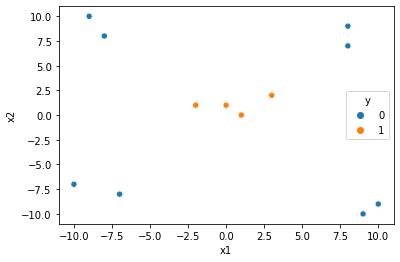

In [2]:
# Creating the dummy data.
dict = {
    'x1':[8,8,-8,-9,-10,-7,9,10,1,0,3,-2],
    'x2':[9,7,8,10,-7,-8,-10,-9,0,1,2,1],
    'y':[0,0,0,0,0,0,0,0,1,1,1,1]
}
df = pd.DataFrame(dict)
sns.scatterplot(data=df, x='x1', y='x2', hue='y')

<AxesSubplot:xlabel='x1*x1', ylabel='x2*x2'>

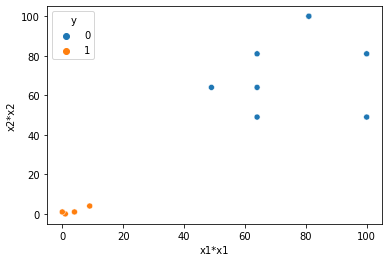

In [3]:
# Applying the non-linear transformation: variable ** 2.
df['x1*x1'] = df['x1'] ** 2
df['x2*x2'] = df['x2'] ** 2

sns.scatterplot(data=df, x='x1*x1', y='x2*x2', hue='y')

## Tradeoff between error vs complexity

**Objective:**
demonstrate how increasing model complexity could lead to smaller sample's error but also to a bigger population's error.

<div>
<img src="img/theory.PNG" width="800"/>
<div>

In [53]:
# Creating the population dataset.
X, y = make_classification(n_samples=1000, n_features=3, n_informative=3, n_redundant=0, n_clusters_per_class=1, class_sep=2, flip_y=0.2, hypercube=False, random_state=52)
df_population = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'x3': X[:,2], 'y':y})

print(df_population.shape)
px.scatter_3d(df_population, x='x1', y='x2', z='x3', color='y', width=700, height=500)

(1000, 4)


In [54]:
# Applying feature engineering to increase the complexity of the model.apply

# Extra features 1: above p50
df_population['x1_above_p50'] = np.where(df_population['x1'] > np.percentile(df_population['x1'], 50), 1, 0)
df_population['x2_above_p50'] = np.where(df_population['x2'] > np.percentile(df_population['x2'], 50), 1, 0)
df_population['x3_above_p50'] = np.where(df_population['x3'] > np.percentile(df_population['x3'], 50), 1, 0)

# Extra features 2: outliers
df_population['x1_outliers'] = np.where((df_population['x1'] > np.percentile(df_population['x1'], 90)) | (df_population['x1'] < np.percentile(df_population['x1'], 10)), 1, 0)
df_population['x2_outliers'] = np.where((df_population['x2'] > np.percentile(df_population['x2'], 90)) | (df_population['x2'] < np.percentile(df_population['x2'], 10)), 1, 0)
df_population['x3_outliers'] = np.where((df_population['x3'] > np.percentile(df_population['x3'], 90)) | (df_population['x3'] < np.percentile(df_population['x3'], 10)), 1, 0)

# Just relocating the target to the last columns 
df_population.insert(len(df_population.columns) - 1, 'y', df_population.pop('y'))
df_population

,x1,x2,x3,x1_above_p50,x2_above_p50,x3_above_p50,x1_outliers,x2_outliers,x3_outliers,y
0,-0.467434,0.395227,-1.147645,0,1,0,0,0,0,1
1,-0.251525,-0.081098,-0.290926,0,1,0,0,0,0,1
2,-0.624090,0.004828,-0.675017,0,1,0,0,0,0,1
3,0.477186,-0.185391,0.340457,1,1,1,0,0,0,0
4,-0.008955,0.819576,-2.383109,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,0.093122,0.205190,0.828548,0,1,1,0,0,0,1
996,-0.152757,0.150728,0.413375,0,1,1,0,0,0,1
997,-0.504861,0.041281,0.558834,0,1,1,0,0,0,0
998,0.525777,0.430589,-2.519968,1,1,0,0,0,1,0


In [55]:
# Extracting the sample dataset.
df_sample = df_population.sample(200)

print(df_sample.shape)
px.scatter_3d(df_sample, x='x1', y='x2', z='x3', color='y', width=700, height=500)

(200, 10)


In [56]:
def train_test_metric(df, list_columns):
    """
    Split the base, train, test and metric given a dataset and list of columns.
    """
    # Separating the train and test data.
    X = df[list_columns]
    y = df['y']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)
    
    # Train and test the model.
    model = DecisionTreeClassifier(max_depth=100, random_state=52)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metric its performance
    acc = accuracy_score(y_test, y_pred)

    return acc

In [94]:
# Calculating the performance as the model complexity is increased.
in_sample_error_list = []
out_of_sample_error_list = []

for i in range(len(df_sample.columns) - 1):

    # Adding new features per round.
    list_features = df_sample.columns[:i + 1].tolist()
    print(f"Round {i+1}: features {list_features}")

    acc_sample = train_test_metric(df_sample, list_features)
    acc_pop = train_test_metric(df_population, list_features)
    in_sample_error_list.append(1 - acc_sample)
    out_of_sample_error_list.append(1 - acc_pop)

Round 1: features ['x1']
Round 2: features ['x1', 'x2']
Round 3: features ['x1', 'x2', 'x3']
Round 4: features ['x1', 'x2', 'x3', 'x1_above_p50']
Round 5: features ['x1', 'x2', 'x3', 'x1_above_p50', 'x2_above_p50']
Round 6: features ['x1', 'x2', 'x3', 'x1_above_p50', 'x2_above_p50', 'x3_above_p50']
Round 7: features ['x1', 'x2', 'x3', 'x1_above_p50', 'x2_above_p50', 'x3_above_p50', 'x1_outliers']
Round 8: features ['x1', 'x2', 'x3', 'x1_above_p50', 'x2_above_p50', 'x3_above_p50', 'x1_outliers', 'x2_outliers']
Round 9: features ['x1', 'x2', 'x3', 'x1_above_p50', 'x2_above_p50', 'x3_above_p50', 'x1_outliers', 'x2_outliers', 'x3_outliers']


[(0.0, 1.0), Text(0.5, 0, 'Model complexity')]

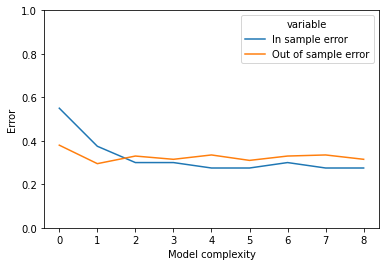

In [96]:
# Plotting the tradeoff between error vs complexity
df_plot = pd.DataFrame({'In sample error': in_sample_error_list, 'Out of sample error': out_of_sample_error_list})
df_plot.reset_index(drop=False, inplace=True)
df_plot = pd.melt(df_plot, id_vars='index', value_vars=['In sample error','Out of sample error'], value_name='Error')
sns.lineplot(data=df_plot, x='index', y='Error', hue='variable').set(ylim=[0, 1], xlabel='Model complexity')